# Titanic - Machine Learning from Disaster
## 라이브러리, 데이터 불러오기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import missingno as msno
from sklearn.model_selection import StratifiedKFold

C:\Users\SYU\miniconda3\envs\analysis\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
cd ..

C:\Users\SYU\Documents\SYUai


In [3]:
%ls input

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: DCC8-39CA

 C:\Users\SYU\Documents\SYUai\input 디렉터리

2022-08-24  오후 02:43    <DIR>          .
2022-08-24  오후 02:48    <DIR>          ..
2022-08-24  오후 02:43             3,258 gender_submission.csv
2022-08-24  오후 02:43            28,629 test.csv
2022-08-24  오후 02:43            61,194 train.csv
               3개 파일              93,081 바이트
               2개 디렉터리  432,501,297,152 바이트 남음


In [4]:
train_df=pd.read_csv('input/train.csv', index_col='PassengerId')
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
test_df=pd.read_csv('input/test.csv',index_col='PassengerId')
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


### 변수 설명
- PassengerId : 각 승객의 고유 번호

- Survived : 생존 여부(종속 변수)

- 0 = 사망
- 1 = 생존
- Pclass : 객실 등급 - 승객의 사회적, 경제적 지위

- 1st = Upper
- 2nd = Middle
- 3rd = Lower
- Name : 이름

- Sex : 성별

- Age : 나이

- SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수

- Parch : 동반한 Parent(부모) Child(자식)의 수

- Ticket : 티켓의 고유넘버

- Fare : 티켓의 요금

- Cabin : 객실 번호

- Embarked : 승선한 항

- C = Cherbourg
- Q = Queenstown
- S = Southampton

## 단변량 시각화 (train_df)

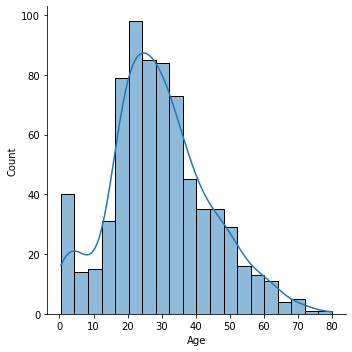

In [6]:
# 타이타닉 탑승개 나이 분포
sns.displot(data=train_df, x='Age',kde=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

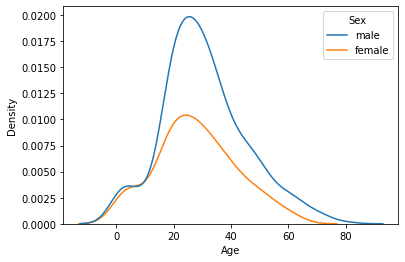

In [7]:
# 타이타닉 탑승객 성별에 따른 나이
sns.kdeplot(data=train_df,x='Age',hue='Sex')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

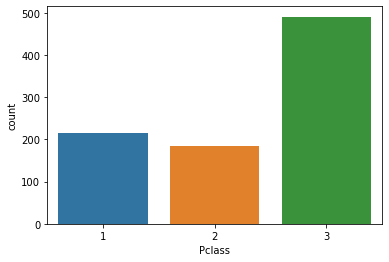

In [8]:
# 타이타닉 객실 등급 카운트
sns.countplot(data=train_df,x='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

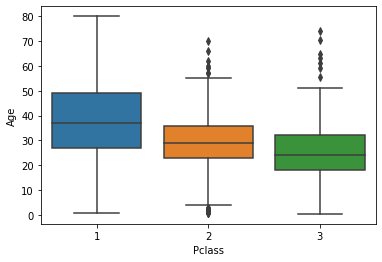

In [9]:
#객실 등급에 따른 나이 분포
sns.boxplot(data=train_df,x='Pclass',y='Age')

### 범주형 단변량 시각화(Categorical)

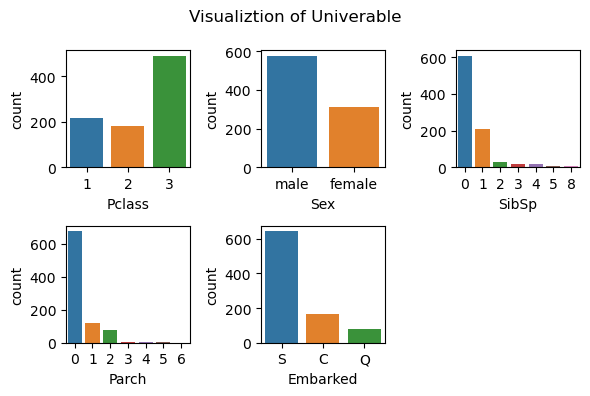

In [10]:
fig, axes=plt.subplots(nrows=2,ncols=3,dpi=100)
sns.countplot(data=train_df, x='Pclass', ax=axes.flat[0])
sns.countplot(data=train_df, x='Sex', ax=axes[0,1])
sns.countplot(data=train_df, x='SibSp', ax=axes[0,2])
sns.countplot(data=train_df, x='Parch', ax=axes.flat[3])
sns.countplot(data=train_df, x='Embarked', ax=axes[1,1])
axes[-1,-1].axis('off')
plt.suptitle('Visualiztion of Univerable')
fig.tight_layout()
plt.show()

### 수치형 단변량 시각화(Numeric)

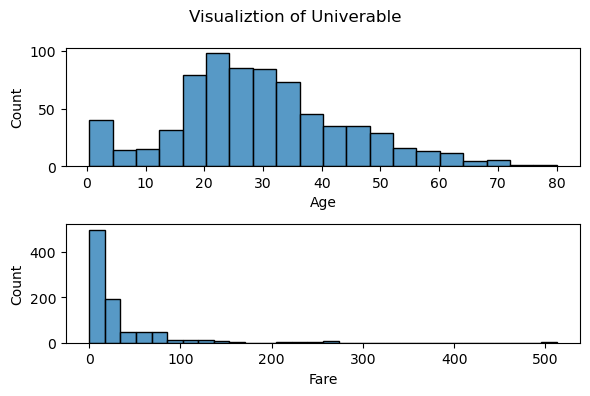

In [11]:
fig, axes=plt.subplots(nrows=2,dpi=100)
sns.histplot(data=train_df, x='Age', ax=axes[0])
sns.histplot(data=train_df, x='Fare', ax=axes[1], bins=30)

plt.suptitle('Visualiztion of Univerable')
fig.tight_layout()
plt.show()

## 다변량 시각화(train_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

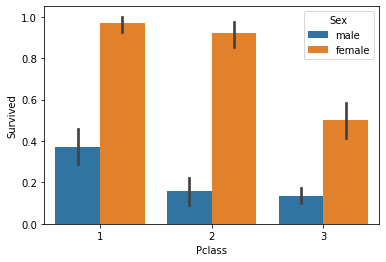

In [12]:
# 객실 등급에 따른 생존자
sns.barplot(data=train_df, x='Pclass',y='Survived',hue='Sex')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

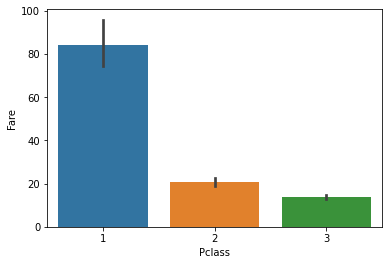

In [13]:
#객실 등급에 따른 요금
sns.barplot(data=train_df,x='Pclass',y='Fare')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

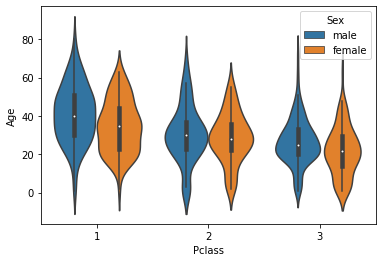

In [14]:
# 나이에 따른 객실 등급
sns.violinplot(data=train_df,y='Age',x='Pclass',hue='Sex')

<AxesSubplot:xlabel='Parch', ylabel='Age'>

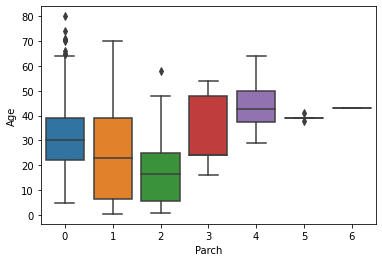

In [15]:
# 나이에 따른 동반 부모나 자식 수
sns.boxplot(data=train_df,y='Age',x='Parch')

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

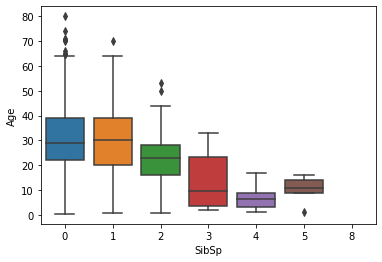

In [16]:
# 나이에 따른 동반 형제자매나 배우자 수
sns.boxplot(data=train_df,y='Age',x='SibSp')

<AxesSubplot:xlabel='Age', ylabel='Density'>

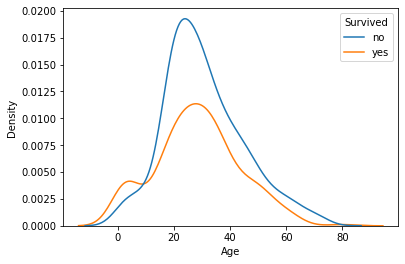

In [17]:
train_df['Survived']=train_df['Survived'].replace({0:'no',1:'yes'})
# 나이에 따른 생존자 분포
sns.kdeplot(data=train_df,x='Age',hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

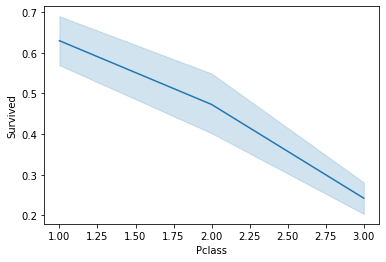

In [18]:
train_df['Survived']=train_df['Survived'].replace({'no':0,'yes':1})
# 생존과 객실등급의 상관관계
sns.lineplot(data=train_df,x='Pclass',y='Survived')

<AxesSubplot:xlabel='Age', ylabel='Fare'>

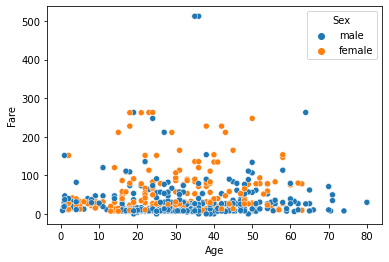

In [19]:
#요금과 나이의 상관관계
sns.scatterplot(data=train_df,x='Age',y='Fare',hue='Sex')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

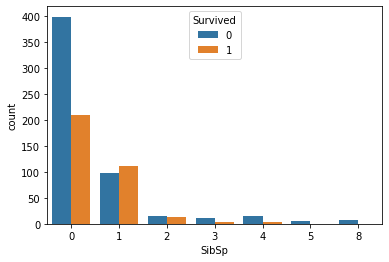

In [20]:
#부모동반 고객의 사망여부
sns.countplot(data=train_df,x='SibSp',hue='Survived')

### 전처리

In [21]:
train_df['Title']=train_df["Name"].apply(lambda x:x.split(',')[1].split('.')[0])
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
 11  Title     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [23]:
train_df['AgeRange']=train_df['Age'].apply(lambda x: (x//10)*10)

In [24]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeRange
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,20.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,30.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,20.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,30.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,20.0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,10.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,NaN


## 베이스라인 모델
### 전처리


In [25]:
#결측치 많은 데이터 빼기
train_df['Cabin'].isnull().sum()

687

In [26]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Title', 'AgeRange'],
      dtype='object')

In [27]:
columns=[ 'Survived','Pclass',  'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [28]:
train_df1=train_df[columns]
train_df1['Sex']=train_df1['Sex'].replace({'male':0,'female':1})
#from sklearn.preprocessing import LabelEncoder

#label_encoder=LabelEncoder()
#label_encoder.fit_transform(train_df['Sex'])

C:\Users\SYU\AppData\Local\Temp\ipykernel_7152\2700207006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df1['Sex']=train_df1['Sex'].replace({'male':0,'female':1})


In [29]:
train_df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,S
2,1,1,1,38.0,1,0,71.2833,C
3,1,3,1,26.0,0,0,7.9250,S
4,1,1,1,35.0,1,0,53.1000,S
5,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,0,27.0,0,0,13.0000,S
888,1,1,1,19.0,0,0,30.0000,S
889,0,3,1,NaN,1,2,23.4500,S


In [30]:
train_df['Sex'].unique()
train_df['Sex']=train_df['Sex'].replace({'male':0,'female':1})

In [31]:
def convert_str2int(df, col_name):
    return df[col_name].replace({v:i for i, v in enumerate(df[col_name].unique())})


train_df1.loc[:,'Sex']=convert_str2int(train_df1,'Sex')
train_df1.loc[:,'Embarked']=convert_str2int(train_df1,'Embarked')

C:\Users\SYU\AppData\Local\Temp\ipykernel_7152\1542570725.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df1.loc[:,'Sex']=convert_str2int(train_df1,'Sex')
C:\Users\SYU\AppData\Local\Temp\ipykernel_7152\1542570725.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df1.loc[:,'Embarked']=convert_str2int(train_df1,'Embarked')


In [32]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 94.9 KB


### 결측치 처리

In [33]:
print(train_df1.shape)
train_df1=train_df1.dropna(axis=0,how='any')
train_df1=train_df1.dropna(axis=1)

(891, 8)


In [34]:
index=int(len(train_df1)*0.8)
train_df1=train_df1.reset_index(drop=True)
validset=train_df1.iloc[index:,:]
trainset=train_df1.iloc[:index,:]
print(validset.shape,trainset)

(143, 8)      Survived  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0           0       3    0  22.0      1      0    7.2500       0.0
1           1       1    1  38.0      1      0   71.2833       1.0
2           1       3    1  26.0      0      0    7.9250       0.0
3           1       1    1  35.0      1      0   53.1000       0.0
4           0       3    0  35.0      0      0    8.0500       0.0
..        ...     ...  ...   ...    ...    ...       ...       ...
566         0       3    0  29.0      0      0    9.4833       0.0
567         0       2    0  52.0      0      0   13.0000       0.0
568         0       3    0  19.0      0      0    7.6500       0.0
569         1       1    1  38.0      0      0  227.5250       1.0
570         1       2    1  27.0      0      0   10.5000       0.0

[571 rows x 8 columns]


In [35]:
train_df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [36]:
x=train_df1.drop('Survived',axis=1)
y=train_df1['Survived']
print(x.shape,y.shape)

(714, 7) (714,)


### 학습 및 검증

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
     x, y, test_size=0.2, random_state=42,shuffle=True)

In [38]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(571, 7) (143, 7) (571,) (143,)


In [39]:
clf=RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)
print(clf.predict(X_test))
print(y_test.values)

[1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1]
[0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1]


In [40]:
y_pred=clf.predict(X_test)
print("학습 데이터셋 정학도:",accuracy_score(clf.predict(X_train),y_train))
print("학습 데이터셋 정학도:",accuracy_score(y_test,y_pred))

학습 데이터셋 정학도: 0.9912434325744308
학습 데이터셋 정학도: 0.7902097902097902
